In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import datetime as dt
import quandl
import os
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

quandl.read_key()
api_key = quandl.ApiConfig.api_key

In [2]:

#Read in National Consumer Price Index Data (1984 is base price at 100)
CPI_Data = pd.read_excel('C:\\Users\\JMadd\\git\\Proletariats\\Data Cleaning\\Resources\\CPI-U.xlsx', index_col=None)

#Data Munging
CPI_Data = CPI_Data.iloc[11:].dropna(axis=1, how='all')

CPI_Data = CPI_Data[CPI_Data['Unnamed: 2'].str.contains('M',case=False)]

CPI_Data['Date'] = pd.date_range(start='1/1/1996', periods=len(CPI_Data), freq='M')

CPI_Data = CPI_Data.drop(['Unnamed: 1', 'Unnamed: 2', 'CPI for All Urban Consumers (CPI-U)'], axis=1)

CPI_Data = CPI_Data.rename(columns={"Unnamed: 3": "CPI-U(1984)"})

CPI_Data = CPI_Data[['Date', 'CPI-U(1984)']]

#Preview
CPI_Data.head()

Date CPI-U(1984)
11 1996-01-31       154.4
12 1996-02-29       154.9
13 1996-03-31       155.7
14 1996-04-30       156.3
15 1996-05-31       156.6

In [3]:
#Read in National Consumer Price Index Data (1984 is base price at 100)
US_Rent = pd.read_excel('C:\\Users\\JMadd\\git\\Proletariats\\Data Cleaning\\Resources\\OER.xlsx', index_col=None)
US_Rent = US_Rent.iloc[11:].dropna(axis=1, how='all')
US_Rent['Date'] = pd.date_range(start='1/1/1996', periods=len(US_Rent), freq='M')
US_Rent = US_Rent.drop(['Unnamed: 1', 'Unnamed: 2', 'CPI-All Urban Consumers (Current Series)'], axis=1)
US_Rent = US_Rent.rename(columns={"Unnamed: 3": "US Owners Equivalent Rent CPI"})

US_Rent = US_Rent[['Date', 'US Owners Equivalent Rent CPI']]
US_Rent.head()

Date US Owners Equivalent Rent CPI
11 1996-01-31                         174.7
12 1996-02-29                           175
13 1996-03-31                         175.3
14 1996-04-30                         175.6
15 1996-05-31                         175.9

In [4]:
#read in Phoenix price to rent ratio
#url = "https://www.quandl.com/api/v3/datasets/ZILLOW/M14_PRRAH.json?api_key={api_key}"    

#response = requests.get(url).json()
#print(response)
#Rent_To_Price_df = pd.DataFrame(response)
#Rent_To_price_df.head()

Zillow_PTR_df = pd.read_csv("C:\\Users\\JMadd\\git\\Proletariats\\Data Cleaning\\Resources\\Zillow_PTR.csv", parse_dates = ['Date'] )
Zillow_PTR_df.head()

Date  Value
0 2019-07-31  12.51
1 2019-06-30  12.59
2 2019-05-31  12.69
3 2019-04-30  15.18
4 2019-03-31  15.22

In [5]:
#Read in Zillow Data
Zillow_Data_df = pd.read_csv("C:\\Users\\JMadd\\git\\Proletariats\\Data Cleaning\\Resources\\Zillow_data.csv", parse_dates = ['Date'] )

#Data Munging to format Labels to be column headers and Dates into rows. This makes plotting easier later.
df = Zillow_Data_df[['Date', 'Value', 'Label']].copy()
df.drop_duplicates(['Date', 'Label'], keep='first', inplace=True)
df = df.pivot(index='Date', columns='Label', values='Value')

#preview
df

Label       median market value of  home sold as foreclosure - ratio - all homes  \
Date                                                                               
1996-04-30                                                NaN                      
1996-05-31                                                NaN                      
1996-06-30                                                NaN                      
1996-07-31                                                NaN                      
1996-08-31                                                NaN                      
1996-09-30                                                NaN                      
1996-10-31                                                NaN                      
1996-11-30                                                NaN                      
1996-12-31                                                NaN                      
1997-01-31                                                NaN                      
1997-02-28                                                NaN                      
1997-03-31                                                NaN                      
1997-04-30                                                NaN                      
1997-05-31                                                NaN                      
1997-06-30                                                NaN                      
1997-07-31                                                NaN                      
1997-08-31                                                NaN                      
1997-09-30                                                NaN                      
1997-10-31                                                NaN                      
1997-11-30                                                NaN                      
1997-12-31                                                NaN                      
1998-01-31                                             2.7046                      
1998-02-28                                             2.5525                      
1998-03-31                                             2.3472                      
1998-04-30                                             2.5338                      
1998-05-31                                             2.6705                      
1998-06-30                                             3.2311                      
1998-07-31                                             3.3434                      
1998-08-31                                             3.6993                      
1998-09-30                                             3.5761                      
...                                                       ...                      
2017-03-31                                             1.1772                      
2017-04-30                                             0.8202                      
2017-05-31                                             0.5184                      
2017-06-30                                             0.3565                      
2017-07-31                                             0.4270                      
2017-08-31                                             0.4927                      
2017-09-30                                                NaN                      
2017-10-31                                                NaN                      
2017-11-30                                                NaN                      
2017-12-31                                                NaN                      
2018-01-31                                                NaN                      
2018-02-28                                                NaN                      
2018-03-31                                                NaN                      
2018-04-30                                                NaN                      
2018-05-31                                          

In [6]:
#Grab Median Market Value
mmvsp_df = df['median market value of sales prices']

#Drop null values so I can see where the Data starts.
mmvsp_df = mmvsp_df.to_frame().dropna()


mmvsp_df = mmvsp_df.reset_index()

#I had to re-create the Dates because I kept getting a key error trying to merge with CPI_Data
mmvsp_df['Date'] = pd.date_range(start='03/31/2008', periods=len(mmvsp_df), freq='M')

#Merge with CPI_Data
CPI_Data = pd.merge(mmvsp_df, CPI_Data, how='outer', on='Date')

#Edit Timeframe so all datasets have values for all dates.
CPI_Data = CPI_Data[(CPI_Data['Date'] >= '2008-12-31') & (CPI_Data['Date'] <= '2018-12-31')]

#Preview
CPI_Data.head()

Date  median market value of sales prices CPI-U(1984)
9  2008-12-31                             122700.0     210.228
10 2009-01-31                             107500.0     211.143
11 2009-02-28                              92700.0     212.193
12 2009-03-31                              81600.0     212.709
13 2009-04-30                              74500.0      213.24

df2 = df.pivot(index = 'Date', columns ='Label', values = 'Value')

In [7]:
#Get US Rent Data for all Dates needed
CPI_Data = pd.merge(CPI_Data, US_Rent, on="Date")

#Get PHX Price to Rent ratio: data for all Dates needed
CPI_Data = pd.merge(CPI_Data, Zillow_PTR_df, on="Date")



#Rename Price to rent ratio to PHX PTR
CPI_Data.rename(columns={ CPI_Data.columns[4]: "PHX PTR" }, inplace = True)

#Preview
CPI_Data.head()

Date  median market value of sales prices CPI-U(1984)  \
0 2010-10-31                              94000.0     218.711   
1 2010-11-30                              90400.0     218.803   
2 2010-12-31                              84900.0     219.179   
3 2011-01-31                              84100.0     220.223   
4 2011-02-28                              83600.0     221.309   

  US Owners Equivalent Rent CPI  PHX PTR  
0                       256.823     9.76  
1                       257.202     9.63  
2                       257.452     9.49  
3                       257.775     9.54  
4                       258.073     9.64

In [8]:
#Calculate Rents
CPI_Data['RentP'] = CPI_Data['PHX PTR'].pct_change()
CPI_Data
CPI_Data.at[0, 'Rent'] = (CPI_Data['median market value of sales prices'].iloc[0] / (CPI_Data['PHX PTR'].iloc[0] * 12))
CPI_Data.head()


Date  median market value of sales prices CPI-U(1984)  \
0 2010-10-31                              94000.0     218.711   
1 2010-11-30                              90400.0     218.803   
2 2010-12-31                              84900.0     219.179   
3 2011-01-31                              84100.0     220.223   
4 2011-02-28                              83600.0     221.309   

  US Owners Equivalent Rent CPI  PHX PTR     RentP        Rent  
0                       256.823     9.76       NaN  802.595628  
1                       257.202     9.63 -0.013320         NaN  
2                       257.452     9.49 -0.014538         NaN  
3                       257.775     9.54  0.005269         NaN  
4                       258.073     9.64  0.010482         NaN

In [9]:
#Find approximate Rent in dollars for every month using PTR ratio and Median market value sold.
for i in range(1, len(CPI_Data)):
    previous_rent = CPI_Data.loc[i-1, 'Rent']
    rent_change = CPI_Data.loc[i, 'RentP']
    CPI_Data.at[i, 'Rent'] = (previous_rent * rent_change) + previous_rent

In [10]:
#Convert Data so that they are all measured by 2010 prices. This lets us see easy percentage changes over time.

def PHXRentFunc(x):
    return (x / CPI_Data['Rent'].iloc[0]) * 100
CPI_Data['PHX Rent CPI'] = CPI_Data['Rent'].apply(PHXRentFunc)


def USRentFunc(x):
    return (x / CPI_Data['US Owners Equivalent Rent CPI'].iloc[0]) * 100
CPI_Data['US Rent CPI'] = CPI_Data['US Owners Equivalent Rent CPI'].apply(USRentFunc)


def CPI_UFunc(x):
    return (x / CPI_Data['CPI-U(1984)'].iloc[0]) * 100
CPI_Data['CPI-U(2010)'] = CPI_Data['CPI-U(1984)'].apply(CPI_UFunc)



def CPI_mmvs(x):
    return (x / CPI_Data['median market value of sales prices'].iloc[0]) * 100
CPI_Data['Median Value Sales'] = CPI_Data['median market value of sales prices'].apply(CPI_mmvs)


CPI_Data

Date  median market value of sales prices CPI-U(1984)  \
0  2010-10-31                              94000.0     218.711   
1  2010-11-30                              90400.0     218.803   
2  2010-12-31                              84900.0     219.179   
3  2011-01-31                              84100.0     220.223   
4  2011-02-28                              83600.0     221.309   
5  2011-03-31                              83600.0     223.467   
6  2011-04-30                              80500.0     224.906   
7  2011-05-31                              79800.0     225.964   
8  2011-06-30                              81500.0     225.722   
9  2011-07-31                              83700.0     225.922   
10 2011-08-31                              86200.0     226.545   
11 2011-09-30                              88700.0     226.889   
12 2011-10-31                              91000.0     226.421   
13 2011-11-30                              94500.0      226.23   
14 2011-12-31                              96800.0     225.672   
15 2012-01-31                              91500.0     226.665   
16 2012-02-29                              85800.0     227.663   
17 2012-03-31                              81200.0     229.392   
18 2012-04-30                              84700.0     230.085   
19 2012-05-31                              93300.0     229.815   
20 2012-06-30                              97100.0     229.478   
21 2012-07-31                             101800.0     229.104   
22 2012-08-31                             104300.0     230.379   
23 2012-09-30                             106600.0     231.407   
24 2012-10-31                             111500.0     231.317   
25 2012-11-30                             115700.0     230.221   
26 2012-12-31                             119900.0     229.601   
27 2013-01-31                             122600.0      230.28   
28 2013-02-28                             120800.0     232.166   
29 2013-03-31                             122600.0     232.773   
..        ...                                  ...         ...   
69 2016-07-31                             176800.0     240.628   
70 2016-08-31                             179100.0     240.849   
71 2016-09-30                             181900.0     241.428   
72 2016-10-31                             184500.0     241.729   
73 2016-11-30                             186800.0     241.353   
74 2016-12-31                             186800.0     241.432   
75 2017-01-31                             188600.0     242.839   
76 2017-02-28                             189000.0     243.603   
77 2017-03-31                             190900.0     243.801   
78 2017-04-30                             190000.0     244.524   
79 2017-05-31                             190700.0     244.733   
80 2017-06-30                             191200.0     244.955   
81 2017-07-31                             193600.0     244.786   
82 2017-08-31                             194700.0     245.519   
83 2017-09-30                             195600.0     246.819   
84 2017-10-31                             197600.0     246.663   
85 2017-11-30                             200400.0     246.669   
86 2017-12-31                             202700.0     246.524   
87 2018-01-31                             206700.0     247.867   
88 2018-02-28                             210700.0     248.991   
89 2018-03-31                             213600.0     249.554   
90 2018-04-30                             216400.0     250.546   
91 2018-05-31                             215900.0     251.588   
92 2018-06-30                             216200.0     251.989   
93 2018-07-31                             218300.0     252.006   
94 2018-08-31                             218800.0     252.146   
95 2018-09-30                             220000.0     252.439   
96 2018-10-31                             219500.0     252.885   
97 2018-11-30                             223700.

In [11]:
#Set Date as index so it appears as the x-axis
CPI_Data.set_index("Date",drop=True,inplace=True)

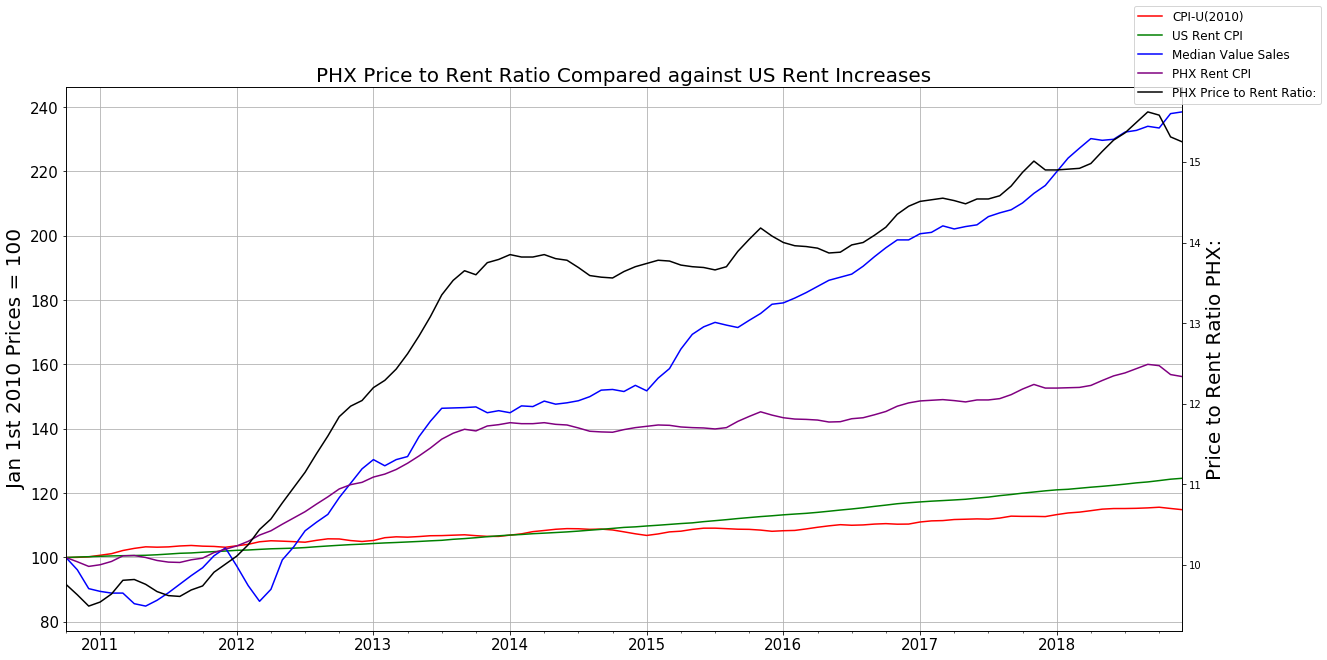

In [12]:
fig = plt.figure(figsize=(20,10)) 
ax = fig.add_subplot(111)



CPI_Data['CPI-U(2010)'].plot(color='red', grid=True, label='CPI-U(2010)', ax=ax)

CPI_Data['US Rent CPI'].plot(color='green', grid=True, label='US Rent CPI', ax=ax)

#Secondary axis has Price to rent ratio for PHX. If you compare the black line vs the left axis you can see percentage change
#since 2010. Compared against the right axis you can see the PTR ratio at any point in time.
CPI_Data['PHX PTR'].plot(color='black', grid=True, secondary_y=True, label='PHX Price to Rent Ratio:', ax=ax)

CPI_Data['Median Value Sales'].plot(color='blue', grid=True, ax=ax)

CPI_Data['PHX Rent CPI'].plot(color='purple', grid=True, ax=ax)








fig.legend(loc="upper right", fontsize=12)
ax.tick_params(labelsize=15)

ax.set_ylabel('Jan 1st 2010 Prices = 100', fontsize=20)
ax.right_ax.set_ylabel('Price to Rent Ratio PHX:', fontsize=20)
ax.set_title('PHX Price to Rent Ratio Compared against US Rent Increases', fontsize=20)



ax.xaxis.label.set_visible(False)

plt.savefig('PHX_CPI.png')

Comparing Phoenix housing cost increases versus other goods and US averages.

The red line on the graph indicates the US Consumer Price Index. The CPI is the average of prices for commonly used items like milk, gasoline, wheat ect. and is the most commonly used metric for determining inflation. We can see on the graph that between 2010-10-31 and 2018-12-31 the average price of goods in America increased by 12%. Or 1.75% per year inflation.


Housing prices are not included in the CPI but rents are as rents represent the consumption of real estate services at a point in time. The green line represents the 'owners equivalent rent' portion of the CPI. This 'OER' value is an estimated rental value of homes and apartments across America. It takes in 3 inputs, rental values, owners’ equivalent rent and lodging away from home. Using the 'OER' as an estimate for US rental values we can see that on average, rents have gone up 24.6% from 2010-10-31 to 2018-12-31.


